# Tutorial 1

Crash course in Julia basics:

Arithmetic, arrays, tuples, strings, dictionaries, functions,
iteration, random numbers, package loading, plotting

(40 min)

## Julia is a calculator:

In [1]:
1 + 2^3

9

In [2]:
sqrt(1 + 2^3) # do `sqrt(ans)` in REPL

3.0

In [3]:
sin(pi)

1.2246467991473532e-16

Query a function's document string using `?sin` at the REPL, or in a
notebook:

In [4]:
@doc sin

```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

```
sin(A::AbstractMatrix)
```

Compute the matrix sine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the sine. Otherwise, the sine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> sin(fill(1.0, (2,2)))
2×2 Matrix{Float64}:
 0.454649  0.454649
 0.454649  0.454649
```


I've forgotten how the arcsin is called. Is it `asin` or `arcsin`? I
can search all doc-strings containing "sine" to locate the method:

In [5]:
apropos("sine")

Base.sinh
Base.Math.sincospi
Base.asinh
Base.sin
Base.Math.acosd
Base.cos
Base.asin
Base.Math.asind
Base.Math.sind
Base.Math.cosd
Base.Math.sincos
Base.Math.sin_kernel
Base.cosh
Base.Math.sincosd
Base.acosh
Base.Math.cos_kernel
Base.acos
Base.asinh
LinearAlgebra.Givens
Base.cosh
LinearAlgebra.svd
Base.acos
Base.sinh
Base.cos
Base.Math.sincos
Base.asin
Base.sin
Base.acosh


Okay, I see it's called `asin`.

In [6]:
asin(1 + 3*im)

0.30760364953071123 + 1.8641615441578825im

## Arrays

One dimensional vectors:

In [7]:
v = [3, 5, 7]

3-element Vector{Int64}:
 3
 5
 7

A "row vector" is a 1 x n array:

In [8]:
row = [3 5 7]

1×3 Matrix{Int64}:
 3  5  7

Multiple row vectors separated by semicolons or new lines define matrices:

In [9]:
A = [3 5 7
     2 4 6
     1 3 5]

3×3 Matrix{Int64}:
 3  5  7
 2  4  6
 1  3  5

In [10]:
size(A)

(3, 3)

Accessing elements (Julia indices start at 1 not 0):

In [11]:
A[1, 2]

5

In [12]:
A[1, 2] == A[2]

false

In [13]:
A[:, 2] # 2nd column

3-element Vector{Int64}:
 5
 4
 3

Changing elements:

In [14]:
A[1, 1] = 42

42

In [15]:
inv(A) # inverse

3×3 Matrix{Float64}:
  0.025641   -0.0512821   0.025641
 -0.0512821   2.60256    -3.05128
  0.025641   -1.55128     2.02564

In [16]:
isapprox(inv(A)*v, A\v) # but RHS more efficient

true

## "Variables" in Julia *point* to objects

Corollary: all passing of function arguments is pass by reference

Like Python; Unlike R, C or FORTRAN.

In [17]:
w = v

w

3-element Vector{Int64}:
 3
 5
 7

In [18]:
v[1] = 42

42

In [19]:
v

3-element Vector{Int64}:
 42
  5
  7

In [20]:
w

3-element Vector{Int64}:
 42
  5
  7

## Tuples

Similar to vectors but of fixed length and immutable (cannot be changed)

In [21]:
t = (1, 2.0, "cat")
typeof(t)

Tuple{Int64, Float64, String}

In [22]:
t[3]

"cat"

Tuples also come in a *named* variety:

In [23]:
(; i = 1, x = 2.0, animal="cat")

(i = 1, x = 2.0, animal = "cat")

## Strings and relatives

In [24]:
a_string = "the cat"
a_character = 't'
a_symbol = :t

:t

In [25]:
a_string[1] == a_character

true

A `Symbol` is string-like but
[interned](https://en.wikipedia.org/wiki/String_interning). Generally
use `String` for ordinary textual data, but use `Symbol` for
language reflection (metaprogramming). For example:

In [26]:
isdefined(Main, :z)

false

In [27]:
z = 1 + 2im
isdefined(Main, :z)

true

In [28]:
z.im

2

In [29]:
fieldnames(typeof(z))

(:re, :im)

Symbols are generalized by *expressions*:

In [30]:
ex = :(z == 3)
eval(ex)

false

If this is confusing, forget it for now.

## Dictionaries

In [31]:
d = Dict('a' => "ant", 'z' => "zebra")

Dict{Char, String} with 2 entries:
  'a' => "ant"
  'z' => "zebra"

In [32]:
d['a']

"ant"

In [33]:
d['b'] = "bat"
d

Dict{Char, String} with 3 entries:
  'a' => "ant"
  'z' => "zebra"
  'b' => "bat"

In [34]:
keys(d)

KeySet for a Dict{Char, String} with 3 entries. Keys:
  'a'
  'z'
  'b'

The expression 'a' => "ant" is itself a stand-alone object:

In [35]:
pair = 'a' => "ant"

first(pair)

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

## Functions

Three ways to define a generic function:

In [36]:
foo(x) = x^2 # METHOD 1 (inline)
foo(3)

9

or

In [37]:
3 |> foo

9

or

In [38]:
3 |> x -> x^2 # METHOD 2 (anonymous)

9

or

In [39]:
function foo2(x) # METHOD 3 (verbose)
    y = x
    z = y
    w = z
    return w^2
end

foo2(3)

9

## Basic iteration

Here are three ways to square the integers from 1 to 10.

METHOD 1 (explicit loop):

In [40]:
squares = [] # or Int[] if performance matters
for x in 1:10
    push!(squares, x^2)
end

squares

10-element Vector{Any}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 2 (comprehension):

In [41]:
[x^2 for x in 1:10]

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 3 (map):

In [42]:
map(x -> x^2, 1:10)

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 4 (broadcasting with dot syntax):

In [43]:
(1:10) .^ 2

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

## Random numbers

In [44]:
typeof(2)

Int64

In [45]:
rand() # sample a Float64 uniformly from interval [0, 1]

0.8955302483739913

In [46]:
rand(3, 4) # do that 12 times and put in a 3 x 4 array

3×4 Matrix{Float64}:
 0.677862  0.555616  0.651302   0.837447
 0.323078  0.515255  0.48956    0.64508
 0.677468  0.887518  0.0701217  0.42795

In [47]:
randn(3, 4) # use normal distribution instead

3×4 Matrix{Float64}:
 0.306536  -0.381456  0.580746   1.24977
 0.308104   0.100692  0.980392  -0.78527
 0.987165  -0.485177  0.644898  -1.27368

In [48]:
rand(Int8) # random elment of type Int8

122

In [49]:
rand(['a', 'b', 'c'], 10) # 10 random elements from a vector

10-element Vector{Char}:
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)

Some standard libraries are needed to do more, for example:

In [50]:
using Random

In [51]:
randstring(30)

"mcbH2wP0uKTW92cJMi6xr5zaU8Tfd9"

In [52]:
using Statistics

In [53]:
y = rand(30)
@show mean(y) quantile(y, 0.75);

mean(y) = 0.5300889169840893
quantile(y, 0.75) = 0.7269375490151377


(Use the macro @show before stuff you want printed prefixed by
*what* it is that is being printed.)

For sampling from more general distributions we need
Distributions.jl package which is not part of the standard library.

## Loading packages

If not in the REPL:

In [54]:
using Pkg                        # built-in package manager
Pkg.activate("env", shared=true) # create a new pkg env

  Activating environment at `~/.julia/environments/env/Project.toml`


Add some packages to your enviroment (latest compatible versions
added by default):

In [55]:
Pkg.add("Distributions")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/env/Project.toml`
  No Changes to `~/.julia/environments/env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/env/Project.toml`
  No Changes to `~/.julia/environments/env/Manifest.toml`


To load the code for use:

In [56]:
using Distributions
using Plots

N = 1000
samples = rand(Normal(), N);   # equivalent to Julia's built-in `randn(d)`
samples = (samples).^2;        # square element-wise

In [57]:
g = fit(Gamma, samples)

Gamma{Float64}(α=0.4979226266465843, θ=1.9480233425659443)

In [58]:
@show mean(g) median(g) pdf(g, 1)

mean(g) = 0.969964899499294
median(g) = 0.4396421612311732
pdf(g, 1) = 0.2412750280890986


0.2412750280890986

## Plotting

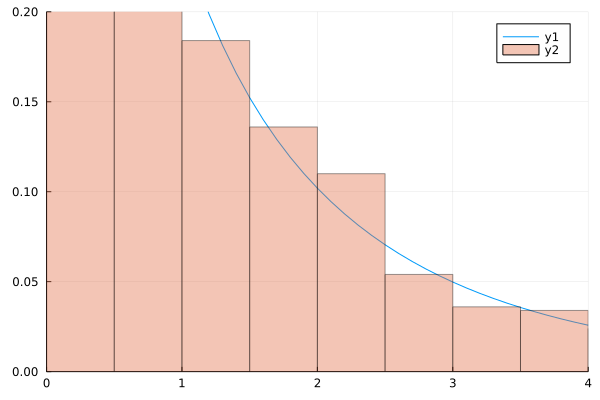

In [59]:
f(x) = pdf(g, x)

x = 0:0.1:4 # floats from 0 to 4 in steps of 0.1
y = f.(x)   # apply f element-wise to x

plot(x, y, xrange=(0,4), yrange=(0,0.2))
histogram!(samples , normalize=true, alpha=0.4)

In [60]:
savefig("my_first_plot.png")

# Exercises

## Exercise 1

Write a function that adds all columns of its matrix input.

## Exercise 2

Write a function that converts a named tuple to a dictionary. You
can create an empty dictionary using `Dict()`.

## Exercise 3

Generate a 1000 random samples from the standard normal
distribution. Create a second such sample, and add the two samples
point-wise.  Compute the (sample) mean and variance of the combined
samples. In the same plot, show a histogram of the combined samples
and a plot of the pdf for normal distribution with zero mean and
variance `2`.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*